## Well basics

Some preliminaries...

In [1]:
%matplotlib inline
import welly
welly.__version__

'0.1.0'

## Load a well

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [2]:
from welly import Well
w = Well.from_las('P-129_out.LAS')

In [3]:
w  # There is no __repr__() function yet.

## Header

Maybe should be called 'meta' as it's not really a header... 

In [4]:
w.header

{'license': 'P-129', 'field': 'Windsor Block', 'name': 'Kennetcook #2'}

In [5]:
w.header.name

'Kennetcook #2'

## Curves

Just a list of objects.

In [6]:
w.curves  # Just a dict of curves objects.

{'CALI': <welly.curve.Curve at 0x10649a128>,
 'DEPT': <welly.curve.Curve at 0x10649a198>,
 'DPHI_DOL': <welly.curve.Curve at 0x10b85e208>,
 'DPHI_LIM': <welly.curve.Curve at 0x10b852c88>,
 'DPHI_SAN': <welly.curve.Curve at 0x10a242f98>,
 'DRHO': <welly.curve.Curve at 0x10b85e550>,
 'DT': <welly.curve.Curve at 0x10a242dd8>,
 'DTS': <welly.curve.Curve at 0x10a242e80>,
 'GR': <welly.curve.Curve at 0x10b85e5c0>,
 'HCAL': <welly.curve.Curve at 0x10a236f28>,
 'NPHI_DOL': <welly.curve.Curve at 0x10b85e320>,
 'NPHI_LIM': <welly.curve.Curve at 0x10b85e2e8>,
 'NPHI_SAN': <welly.curve.Curve at 0x10b85e2b0>,
 'PEF': <welly.curve.Curve at 0x10a242d30>,
 'RHOB': <welly.curve.Curve at 0x10b85e588>,
 'RLA1': <welly.curve.Curve at 0x10b85e400>,
 'RLA2': <welly.curve.Curve at 0x10b85e438>,
 'RLA3': <welly.curve.Curve at 0x10b85e390>,
 'RLA4': <welly.curve.Curve at 0x10b85e3c8>,
 'RLA5': <welly.curve.Curve at 0x10b85e358>,
 'RM_HRLT': <welly.curve.Curve at 0x10b85e518>,
 'RT_HRLT': <welly.curve.Curve at 

In [7]:
w.curves['GR'].basis[:15]

array([ 1.0668,  1.2192,  1.3716,  1.524 ,  1.6764,  1.8288,  1.9812,
        2.1336,  2.286 ,  2.4384,  2.5908,  2.7432,  2.8956,  3.048 ,
        3.2004])

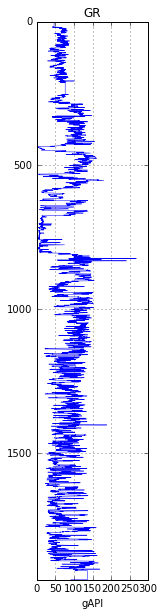

In [8]:
w.curves['GR'].plot(lw=0.5)

In [9]:
gr = w.curves['GR']
gr.read_at(1001)

97.99112340886289

In [10]:
gr.read_at([1001, 1003, 1004])

array([  97.99112341,  116.8162655 ,  104.1488654 ])

In [11]:
gr.step = 2

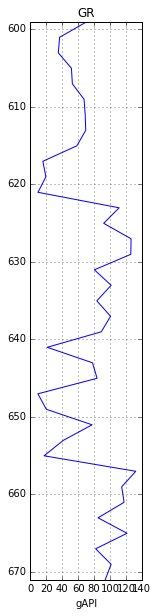

In [12]:
segment = gr.segment((600, 675))  # How could we ask for 'up to end'? e.g to set a new start. Maybe just (500, 10e6)
segment.plot()

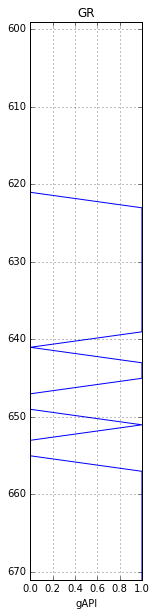

In [14]:
import numpy as np
segment.block().plot()

## Not implemented yet

PUT WISHED-FOR APIS HERE.

A method to get a subset of the curve, from arbitrary depth to arbitrary depth, possibly resampling.

In [14]:
w.curves['GR'].segment((1000, 1200), return_basis=True)   # optional: new step  # optional pass back basis

TypeError: segment() got an unexpected keyword argument 'return_basis'